In [330]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [332]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#Example Dataset

In [333]:
data=pd.read_csv("/content/drive/MyDrive/blackhole prediction/6 class csv.csv")

In [334]:
data.shape

(240, 7)

In [335]:
!pip install -U dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [336]:
data.head()

Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068          0.002400        0.1700                   16.12   
1             3042          0.000500        0.1542                   16.60   
2             2600          0.000300        0.1020                   18.70   
3             2800          0.000200        0.1600                   16.65   
4             1939          0.000138        0.1030                   20.06   

   Star type Star color Spectral Class  
0          0        Red              M  
1          0        Red              M  
2          0        Red              M  
3          0        Red              M  
4          0        Red              M

In [337]:
data.describe().T

count           mean            std         min  \
Temperature (K)         240.0   10497.462500    9552.425037  1939.00000   
Luminosity(L/Lo)        240.0  107188.361635  179432.244940     0.00008   
Radius(R/Ro)            240.0     237.157781     517.155763     0.00840   
Absolute magnitude(Mv)  240.0       4.382396      10.532512   -11.92000   
Star type               240.0       2.500000       1.711394     0.00000   

                                25%        50%          75%        max  
Temperature (K)         3344.250000  5776.0000   15055.5000   40000.00  
Luminosity(L/Lo)           0.000865     0.0705  198050.0000  849420.00  
Radius(R/Ro)               0.102750     0.7625      42.7500    1948.50  
Absolute magnitude(Mv)    -6.232500     8.3130      13.6975      20.06  
Star type                  1.000000     2.5000       4.0000       5.00

In [338]:
data.corr()


<ipython-input-338-c44ded798807>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  \
Temperature (K)                1.000000          0.393404      0.064216   
Luminosity(L/Lo)               0.393404          1.000000      0.526516   
Radius(R/Ro)                   0.064216          0.526516      1.000000   
Absolute magnitude(Mv)        -0.420261         -0.692619     -0.608728   
Star type                      0.411129          0.676845      0.660975   

                        Absolute magnitude(Mv)  Star type  
Temperature (K)                      -0.420261   0.411129  
Luminosity(L/Lo)                     -0.692619   0.676845  
Radius(R/Ro)                         -0.608728   0.660975  
Absolute magnitude(Mv)                1.000000  -0.955276  
Star type                            -0.955276   1.000000

In [339]:
data["Star type"].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Star type, dtype: int64

###Replace names for better understanding and visualisation

In [340]:
data["Star Name"]=data["Star type"]

In [341]:
data["Star Name"].replace(0, "Brown Dwarf",inplace=True)
data["Star Name"].replace(1, "Red Dwarf",inplace=True)
data["Star Name"].replace(2, "White Dwarf",inplace=True)
data["Star Name"].replace(3, "Main Sequence",inplace=True)
data["Star Name"].replace(4, "Supergaint",inplace=True)
data["Star Name"].replace(5, "HyperGaint",inplace=True)

In [342]:
data["color"]=data["Star color"]

In [343]:
data.head()

Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068          0.002400        0.1700                   16.12   
1             3042          0.000500        0.1542                   16.60   
2             2600          0.000300        0.1020                   18.70   
3             2800          0.000200        0.1600                   16.65   
4             1939          0.000138        0.1030                   20.06   

   Star type Star color Spectral Class    Star Name color  
0          0        Red              M  Brown Dwarf   Red  
1          0        Red              M  Brown Dwarf   Red  
2          0        Red              M  Brown Dwarf   Red  
3          0        Red              M  Brown Dwarf   Red  
4          0        Red              M  Brown Dwarf   Red

#The Real Dataset

In [344]:
data1=pd.read_csv("/content/drive/MyDrive/stardustdata/Star39552_balanced.csv")

In [345]:
data1.head()

Vmag    Plx  e_Plx    B-V SpType       Amag  TargetClass
0  10.00  31.66   6.19  1.213    K7V  22.502556            1
1   8.26   3.21   1.00  1.130  K0III  15.792525            0
2   8.27  12.75   1.06  0.596    F9V  18.797552            1
3   6.54   5.23   0.76  1.189  K1III  15.132508            0
4   8.52   0.96   0.72  0.173    B8V  13.431356            1

In [346]:
data.shape

(240, 9)

In [347]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39552 entries, 0 to 39551
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         39552 non-null  float64
 1   Plx          39552 non-null  float64
 2   e_Plx        39552 non-null  float64
 3   B-V          39552 non-null  float64
 4   SpType       39552 non-null  object 
 5   Amag         39552 non-null  float64
 6   TargetClass  39552 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.1+ MB


In [348]:
data1.describe()

Vmag           Plx         e_Plx           B-V          Amag  \
count  39552.000000  39552.000000  39552.000000  39552.000000  39552.000000   
mean       7.921309      7.117378      1.109705      0.744336     16.050687   
std        1.308857     12.446291      0.788133      0.513987      2.443937   
min       -0.620000    -27.840000      0.420000     -0.400000     -0.350000   
25%        7.210000      2.430000      0.800000      0.358000     14.756514   
50%        8.160000      4.440000      0.990000      0.703000     16.020827   
75%        8.830000      8.232500      1.230000      1.129000     17.590542   
max       12.850000    772.330000     40.630000      3.440000     30.449015   

        TargetClass  
count  39552.000000  
mean       0.500000  
std        0.500006  
min        0.000000  
25%        0.000000  
50%        0.500000  
75%        1.000000  
max        1.000000

In [349]:
from pandas import errors
data1['Vmag']=pd.to_numeric(data1['Vmag'], downcast="float", errors='coerce')
data1["Plx"]=pd.to_numeric(data1["Plx"],downcast="float", errors='coerce')
data1["e_Plx"]=pd.to_numeric(data1["e_Plx"],downcast="float", errors='coerce')
data1["B-V"]=pd.to_numeric(data1["B-V"],downcast="float", errors='coerce')

#Data Visualisation using Dataprep

In [350]:
from dataprep.eda import create_report


In [351]:
huihui=create_report(data1,title="Report of Dataset")

/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Report of Dataset
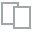
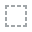
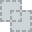
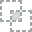
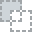
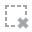
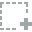
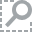
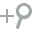
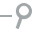
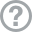
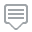
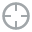
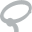
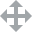
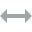
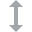
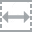
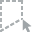
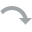
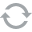
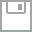
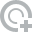
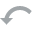
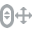
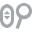
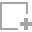
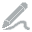
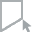
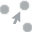
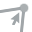
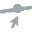

In [352]:
huihui

In [353]:
data1.isna().sum().sum()

0

##Reducing the error
###e_plx is standard error on plx value

In [354]:
value=data1['e_Plx'].mean()+0.5
data1=data1[data1['e_Plx']<value]

###We are changing the target variable of this dataset to normal feature as it will help us to decide yes or no for blackhole

In [355]:
data1["DwarforGaint"]=data1["TargetClass"]

###Converting temperature to kelvin
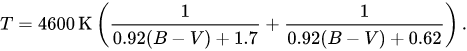

In [356]:
data1["Temp"]=4600*((1/(0.92*data1['B-V']+1.7))+(1/(0.92*data1['B-V']+0.62)))

In [357]:
data1.head()

Vmag    Plx  e_Plx    B-V SpType       Amag  TargetClass  DwarforGaint  \
1  8.26   3.21   1.00  1.130  K0III  15.792525            0             0   
2  8.27  12.75   1.06  0.596    F9V  18.797552            1             1   
3  6.54   5.23   0.76  1.189  K1III  15.132508            0             0   
4  8.52   0.96   0.72  0.173    B8V  13.431356            1             1   
5  6.09   6.02   0.95  0.040  B8IVn  14.987983            1             1   

          Temp  
1  4450.829102  
2  5983.249512  
3  4330.424316  
4  8378.029297  
5  9652.203125

###Now calcuating the luminosity
M = -2.5 * log₁₀(L / L₀)

In [358]:
data1["Luminosity"]=((10)**(data1['Amag']/-2.5))

In [359]:
data1.head(10)

Vmag    Plx  e_Plx    B-V  SpType       Amag  TargetClass  DwarforGaint  \
1   8.26   3.21   1.00  1.130   K0III  15.792525            0             0   
2   8.27  12.75   1.06  0.596     F9V  18.797552            1             1   
3   6.54   5.23   0.76  1.189   K1III  15.132508            0             0   
4   8.52   0.96   0.72  0.173     B8V  13.431356            1             1   
5   6.09   6.02   0.95  0.040   B8IVn  14.987983            1             1   
6   7.94   5.36   0.61  1.066   K0III  16.585825            0             0   
7   6.81  13.13   1.04  1.030   K1III  17.401323            0             0   
8   7.68   0.66   0.62  0.013   B2V:e  11.777719            1             1   
9   8.78   8.26   1.14  0.682    G2IV  18.364899            1             1   
11  5.18   2.52   0.55 -0.274  B1IV/V  12.187002            1             1   

            Temp    Luminosity  
1    4450.829102  4.819367e-07  
2    5983.249512  3.026768e-08  
3    4330.424316  8.851091e-07  
4    8378.029297  4.240896e-06  
5    9652.203125  1.011130e-06  
6    4589.664062  2.320973e-07  
7    4671.844238  1.095143e-07  
8    9965.919922  1.944967e-05  
9    5663.972656  4.508586e-08  
11  15679.688477  1.334133e-05

In [360]:
data1.shape

(36188, 10)

In [361]:
yesno=(data1["Luminosity"]<0)

In [362]:
yesno.value_counts()


False    36188
Name: Luminosity, dtype: int64

##Calculating radius of star using temperature and luminiosity




In [363]:
data1['Radius']= np.sqrt(((data1['Luminosity'])*(3.827*(10**26)))/(4*3.141593*(5.7*(10**(-8)))*(data1['Temp']**4)))

In [364]:
data.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class',
       'Star Name', 'color'],
      dtype='object')

In [365]:
data1.describe()

Vmag           Plx         e_Plx           B-V          Amag  \
count  36188.000000  36188.000000  36188.000000  36188.000000  36188.000000   
mean       7.805484      6.899047      0.976852      0.750107     15.900337   
std        1.265664     11.304260      0.257365      0.521826      2.343616   
min       -0.620000     -6.680000      0.420000     -0.400000     -0.350000   
25%        7.110000      2.420000      0.780000      0.345000     14.674146   
50%        8.060000      4.360000      0.950000      0.735000     15.921938   
75%        8.730000      8.050000      1.160000      1.140000     17.362443   
max       11.230000    742.119995      1.600000      3.440000     25.894913   

        TargetClass  DwarforGaint          Temp    Luminosity        Radius  
count  36188.000000  36188.000000  36188.000000  3.618800e+04  3.618800e+04  
mean       0.477672      0.477672   6148.901855  1.200379e-04  1.553198e+06  
std        0.499508      0.499508   2283.914307  7.762207e-03  1.055151e+07  
min        0.000000      0.000000   2160.955811  4.385658e-11  6.221289e+03  
25%        0.000000      0.000000   4429.929199  1.135070e-07  1.531398e+05  
50%        0.000000      0.000000   5484.698730  4.277843e-07  4.343471e+05  
75%        1.000000      1.000000   7187.352539  1.350024e-06  1.066614e+06  
max        1.000000      1.000000  21707.421875  1.380384e+00  6.484185e+08

In [366]:
data1["DwarforGaint"].value_counts()

0    18902
1    17286
Name: DwarforGaint, dtype: int64

In [367]:
data1["Coldornot"]=data1["SpType"]

In [368]:
def type(ro):
  if ro["Coldornot"].startswith('M') or ro["Coldornot"].startswith('K') or ro["Coldornot"].startswith('G'):
    return 1
  else:
    return 0;


In [369]:
data1["Coldornot"]=data1.apply(lambda ro: type(ro),axis=1)

In [370]:
data1.head()

Vmag    Plx  e_Plx    B-V SpType       Amag  TargetClass  DwarforGaint  \
1  8.26   3.21   1.00  1.130  K0III  15.792525            0             0   
2  8.27  12.75   1.06  0.596    F9V  18.797552            1             1   
3  6.54   5.23   0.76  1.189  K1III  15.132508            0             0   
4  8.52   0.96   0.72  0.173    B8V  13.431356            1             1   
5  6.09   6.02   0.95  0.040  B8IVn  14.987983            1             1   

          Temp    Luminosity        Radius  Coldornot  
1  4450.829102  4.819367e-07  8.100280e+05          1  
2  5983.249512  3.026768e-08  1.123317e+05          0  
3  4330.424316  8.851091e-07  1.159643e+06          1  
4  8378.029297  4.240896e-06  6.781596e+05          0  
5  9652.203125  1.011130e-06  2.494809e+05          0

In [371]:
data1["Coldornot"].value_counts()

1    20515
0    15673
Name: Coldornot, dtype: int64

In [372]:
data1.shape

(36188, 12)

###KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable.

Axes(0.125,0.11;0.775x0.77)


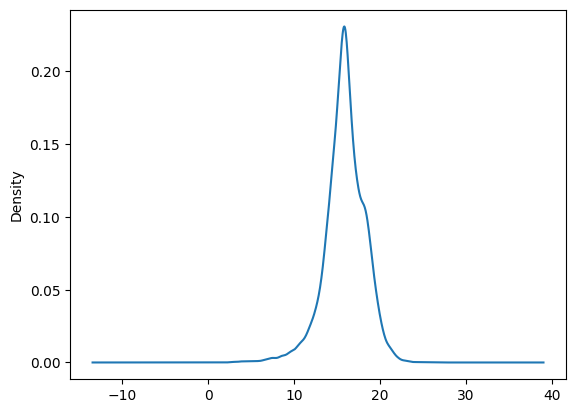

In [373]:
print(data1["Amag"].plot.kde())

In [374]:
import plotly.express as px

In [375]:
fig=px.scatter(data1,x="Temp",y="Luminosity", color="DwarforGaint",log_x=True,log_y=True,title="Temperature vs Luminosity")
fig.show()

In [376]:
fig=px.scatter(data1,x="Amag",y="Temp",color="B-V",log_x=True,log_y=True,title="Amag vs Temperature")
fig.show()

##We will now calculate the distance between each blackhole and earth

In [377]:
data1['Distance(Km)'] = ((1/data1['Plx'])*(3.08567758149137*(10**13)))

In [378]:
data1['Distance(parsec)'] = ((1/data1['Plx']))

In [379]:
data1.describe().T


count          mean           std           min  \
Vmag              36188.0  7.805484e+00  1.265664e+00 -6.200000e-01   
Plx               36188.0  6.899047e+00  1.130426e+01 -6.680000e+00   
e_Plx             36188.0  9.768522e-01  2.573651e-01  4.200000e-01   
B-V               36188.0  7.501070e-01  5.218257e-01 -4.000000e-01   
Amag              36188.0  1.590034e+01  2.343616e+00 -3.499999e-01   
TargetClass       36188.0  4.776722e-01  4.995081e-01  0.000000e+00   
DwarforGaint      36188.0  4.776722e-01  4.995081e-01  0.000000e+00   
Temp              36188.0  6.148902e+03  2.283914e+03  2.160956e+03   
Luminosity        36188.0  1.200379e-04  7.762207e-03  4.385658e-11   
Radius            36188.0  1.553198e+06  1.055151e+07  6.221289e+03   
Coldornot         36188.0  5.669006e-01  4.955109e-01  0.000000e+00   
Distance(Km)      36188.0  1.044967e+13  1.058830e+14 -3.085678e+15   
Distance(parsec)  36188.0  3.386508e-01  3.431435e+00 -1.000000e+02   

                           25%           50%           75%           max  
Vmag              7.110000e+00  8.060000e+00  8.730000e+00  1.123000e+01  
Plx               2.420000e+00  4.360000e+00  8.050000e+00  7.421200e+02  
e_Plx             7.800000e-01  9.500000e-01  1.160000e+00  1.600000e+00  
B-V               3.450000e-01  7.350000e-01  1.140000e+00  3.440000e+00  
Amag              1.467415e+01  1.592194e+01  1.736244e+01  2.589491e+01  
TargetClass       0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  
DwarforGaint      0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  
Temp              4.429929e+03  5.484699e+03  7.187353e+03  2.170742e+04  
Luminosity        1.135070e-07  4.277843e-07  1.350024e-06  1.380384e+00  
Radius            1.531398e+05  4.343471e+05  1.066614e+06  6.484185e+08  
Coldornot         0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
Distance(Km)      3.562111e+12  6.693443e+12  1.191381e+13  3.085678e+15  
Distance(parsec)  1.154401e-01  2.169197e-01  3.861004e-01  1.000000e+02

##We are interested in the Mass as we need the Biggest Star Masses only to be counted as the stars which could form a black hole according to ( Schwardzchild radius law) must be 30 times bigger than the sun:


####Main sequence class are labeled V

In [380]:
data1.head()

Vmag    Plx  e_Plx    B-V SpType       Amag  TargetClass  DwarforGaint  \
1  8.26   3.21   1.00  1.130  K0III  15.792525            0             0   
2  8.27  12.75   1.06  0.596    F9V  18.797552            1             1   
3  6.54   5.23   0.76  1.189  K1III  15.132508            0             0   
4  8.52   0.96   0.72  0.173    B8V  13.431356            1             1   
5  6.09   6.02   0.95  0.040  B8IVn  14.987983            1             1   

          Temp    Luminosity        Radius  Coldornot  Distance(Km)  \
1  4450.829102  4.819367e-07  8.100280e+05          1  9.612702e+12   
2  5983.249512  3.026768e-08  1.123317e+05          0  2.420139e+12   
3  4330.424316  8.851091e-07  1.159643e+06          1  5.899957e+12   
4  8378.029297  4.240896e-06  6.781596e+05          0  3.214248e+13   
5  9652.203125  1.011130e-06  2.494809e+05          0  5.125710e+12   

   Distance(parsec)  
1          0.311526  
2          0.078431  
3          0.191205  
4          1.041667  
5          0.166113

In [381]:
def seq(ro):
    if ro["DwarforGaint"]==1:
      for i in range(len(data1['SpType'])):
        if "V" in ro['SpType'][i]:
          return 1
    else:
      return 0


In [382]:
data1['impt_seq']=data1.apply(lambda ro:seq(ro),axis=1)

In [383]:
data1['impt_seq']=data1['impt_seq'].fillna(0)

In [384]:
data1['impt_seq'].value_counts()

0    18902
1    17286
Name: impt_seq, dtype: int64

In [385]:
data1.head()

Vmag    Plx  e_Plx    B-V SpType       Amag  TargetClass  DwarforGaint  \
1  8.26   3.21   1.00  1.130  K0III  15.792525            0             0   
2  8.27  12.75   1.06  0.596    F9V  18.797552            1             1   
3  6.54   5.23   0.76  1.189  K1III  15.132508            0             0   
4  8.52   0.96   0.72  0.173    B8V  13.431356            1             1   
5  6.09   6.02   0.95  0.040  B8IVn  14.987983            1             1   

          Temp    Luminosity        Radius  Coldornot  Distance(Km)  \
1  4450.829102  4.819367e-07  8.100280e+05          1  9.612702e+12   
2  5983.249512  3.026768e-08  1.123317e+05          0  2.420139e+12   
3  4330.424316  8.851091e-07  1.159643e+06          1  5.899957e+12   
4  8378.029297  4.240896e-06  6.781596e+05          0  3.214248e+13   
5  9652.203125  1.011130e-06  2.494809e+05          0  5.125710e+12   

   Distance(parsec)  impt_seq  
1          0.311526         0  
2          0.078431         1  
3          0.191205         0  
4          1.041667         1  
5          0.166113         1

In [386]:
data1['Mass']=np.sqrt(np.sqrt(data1['Luminosity']/(3.846*(10**26))))*(1.989*(10**30))

In [387]:
data1.describe().T

count          mean           std           min  \
Vmag              36188.0  7.805484e+00  1.265664e+00 -6.200000e-01   
Plx               36188.0  6.899047e+00  1.130426e+01 -6.680000e+00   
e_Plx             36188.0  9.768522e-01  2.573651e-01  4.200000e-01   
B-V               36188.0  7.501070e-01  5.218257e-01 -4.000000e-01   
Amag              36188.0  1.590034e+01  2.343616e+00 -3.499999e-01   
TargetClass       36188.0  4.776722e-01  4.995081e-01  0.000000e+00   
DwarforGaint      36188.0  4.776722e-01  4.995081e-01  0.000000e+00   
Temp              36188.0  6.148902e+03  2.283914e+03  2.160956e+03   
Luminosity        36188.0  1.200379e-04  7.762207e-03  4.385658e-11   
Radius            36188.0  1.553198e+06  1.055151e+07  6.221289e+03   
Coldornot         36188.0  5.669006e-01  4.955109e-01  0.000000e+00   
Distance(Km)      36188.0  1.044967e+13  1.058830e+14 -3.085678e+15   
Distance(parsec)  36188.0  3.386508e-01  3.431435e+00 -1.000000e+02   
impt_seq          36188.0  4.776722e-01  4.995081e-01  0.000000e+00   
Mass              36188.0  1.373158e+22  1.240834e+22  1.155823e+21   

                           25%           50%           75%           max  
Vmag              7.110000e+00  8.060000e+00  8.730000e+00  1.123000e+01  
Plx               2.420000e+00  4.360000e+00  8.050000e+00  7.421200e+02  
e_Plx             7.800000e-01  9.500000e-01  1.160000e+00  1.600000e+00  
B-V               3.450000e-01  7.350000e-01  1.140000e+00  3.440000e+00  
Amag              1.467415e+01  1.592194e+01  1.736244e+01  2.589491e+01  
TargetClass       0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  
DwarforGaint      0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  
Temp              4.429929e+03  5.484699e+03  7.187353e+03  2.170742e+04  
Luminosity        1.135070e-07  4.277843e-07  1.350024e-06  1.380384e+00  
Radius            1.531398e+05  4.343471e+05  1.066614e+06  6.484185e+08  
Coldornot         0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
Distance(Km)      3.562111e+12  6.693443e+12  1.191381e+13  3.085678e+15  
Distance(parsec)  1.154401e-01  2.169197e-01  3.861004e-01  1.000000e+02  
impt_seq          0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  
Mass              8.244003e+21  1.148653e+22  1.530974e+22  4.868357e+23

## Finding the sun in the dataset:

- we know that Sun's SpType is G2V and Its BV is 0.65

In [388]:
data1.loc[data1['B-V']==0.650]


Vmag        Plx  e_Plx   B-V  SpType       Amag  TargetClass  \
6021   9.83  11.690000   1.51  0.65     F3V  20.169071            1   
9103   9.64  10.900000   1.42  0.65     G3V  19.827133            1   
14033  7.93  -0.090000   1.04  0.65    F3II   7.701212            0   
15123  8.69   8.590000   1.34  0.65     G3V  18.359966            1   
16026  8.94  13.770000   0.86  0.65     G3V  19.634670            1   
17507  8.52  18.110001   0.73  0.65     G2V  19.809593            1   
18891  8.58   9.060000   1.06  0.65     G2V  18.365643            1   
18942  7.86  23.090000   0.62  0.65     G2V  19.677120            1   
20920  8.74   5.790000   1.30  0.65     G2V  17.553392            1   
24524  7.78  17.830000   0.91  0.65     G1V  19.035757            1   
24656  8.29  14.380000   1.03  0.65     G2V  19.078794            1   
25232  9.28  12.880000   1.54  0.65    G3IV  19.829578            1   
25624  7.94  20.990000   0.85  0.65     G3V  19.550062            1   
26475  6.97   0.510000   0.77  0.65  F2Iab:  10.507851            0   
27442  8.55  20.580000   1.03  0.65     G2V  20.117226            1   
28569  9.71  10.340000   1.51  0.65  G5/G6V  19.782604            1   
32453  8.39  15.130000   0.77  0.65     G5V  19.289196            1   
34806  8.14   4.310000   0.64  0.65  F8IV/V  16.312386            1   
35323  8.67  15.360000   1.12  0.65  F8/G0V  19.601957            1   
36890  9.65   7.940000   1.50  0.65     F8V  19.149101            1   
38013  9.07  14.610000   1.27  0.65     G1V  19.893250            1   

       DwarforGaint         Temp    Luminosity        Radius  Coldornot  \
6021              1  5778.423828  8.557987e-09  6.404038e+04          0   
9103              1  5778.423828  1.172592e-08  7.496205e+04          1   
14033             0  5778.423828  8.308358e-04  1.995380e+07          0   
15123             1  5778.423828  4.529118e-08  1.473245e+05          1   
16026             1  5778.423828  1.400013e-08  8.190946e+04          1   
17507             1  5778.423828  1.191689e-08  7.557001e+04          1   
18891             1  5778.423828  4.505498e-08  1.469398e+05          1   
18942             1  5778.423828  1.346331e-08  8.032377e+04          1   
20920             1  5778.423828  9.520137e-08  2.135943e+05          1   
24524             1  5778.423828  2.430509e-08  1.079237e+05          1   
24656             1  5778.423828  2.336051e-08  1.058058e+05          1   
25232             1  5778.423828  1.169954e-08  7.487770e+04          1   
25624             1  5778.423828  1.513475e-08  8.516393e+04          1   
26475             0  5778.423828  6.264113e-05  5.478957e+06          0   
27442             1  5778.423828  8.976553e-09  6.558777e+04          1   
28569             1  5778.423828  1.221683e-08  7.651512e+04          1   
32453             1  5778.423828  1.924516e-08  9.603485e+04          1   
34806             1  5778.423828  2.985696e-07  3.782604e+05          0   
35323             1  5778.423828  1.442837e-08  8.315276e+04          0   
36890             1  5778.423828  2.189574e-08  1.024349e+05          0   
38013             1  5778.423828  1.103316e-08  7.271401e+04          1   

       Distance(Km)  Distance(parsec)  impt_seq          Mass  
6021   2.639587e+12          0.085543         1  4.319917e+21  
9103   2.830897e+12          0.091743         1  4.673790e+21  
14033 -3.428530e+14        -11.111111         0  7.625376e+22  
15123  3.592174e+12          0.116414         1  6.552181e+21  
16026  2.240870e+12          0.072622         1  4.885573e+21  
17507  1.703853e+12          0.055218         1  4.692704e+21  
18891  3.405825e+12          0.110375         1  6.543621e+21  
18942  1.336370e+12          0.043309         1  4.838051e+21  
20920  5.329322e+12          0.172712         1  7.889387e+21  
24524  1.730610e+12          0.056085         1  5.607984e+21  
24656  2.145812e+12          0.069541         1  5.552685e+21  
25232  2.395712e+12      

In [389]:
data1.loc[data1['Plx']==742.119995]

Vmag         Plx  e_Plx   B-V SpType       Amag  TargetClass  \
21069 -0.01  742.119995    1.4  0.71    G2V  19.342371            1   
26131  1.35  742.119995    1.4  0.90    K1V  20.702372            1   

       DwarforGaint         Temp    Luminosity         Radius  Coldornot  \
21069             1  5567.728516  1.832532e-08  100938.430079          1   
26131             1  4996.416016  5.236622e-09   67003.156068          1   

       Distance(Km)  Distance(parsec)  impt_seq          Mass  
21069  4.157923e+10          0.001347         1  5.225711e+21  
26131  4.157923e+10          0.001347         1  3.820720e+21

## Now let us Calculate Our Estimated Star's Mass which could form a black hole:

In [390]:
temp=5.225973*(10**21)

In [391]:
factor=temp*30

In [392]:
factor

1.5677919e+23

In [393]:
data1.describe()


Vmag           Plx         e_Plx           B-V          Amag  \
count  36188.000000  36188.000000  36188.000000  36188.000000  36188.000000   
mean       7.805484      6.899047      0.976852      0.750107     15.900337   
std        1.265664     11.304260      0.257365      0.521826      2.343616   
min       -0.620000     -6.680000      0.420000     -0.400000     -0.350000   
25%        7.110000      2.420000      0.780000      0.345000     14.674146   
50%        8.060000      4.360000      0.950000      0.735000     15.921938   
75%        8.730000      8.050000      1.160000      1.140000     17.362443   
max       11.230000    742.119995      1.600000      3.440000     25.894913   

        TargetClass  DwarforGaint          Temp    Luminosity        Radius  \
count  36188.000000  36188.000000  36188.000000  3.618800e+04  3.618800e+04   
mean       0.477672      0.477672   6148.901855  1.200379e-04  1.553198e+06   
std        0.499508      0.499508   2283.914307  7.762207e-03  1.055151e+07   
min        0.000000      0.000000   2160.955811  4.385658e-11  6.221289e+03   
25%        0.000000      0.000000   4429.929199  1.135070e-07  1.531398e+05   
50%        0.000000      0.000000   5484.698730  4.277843e-07  4.343471e+05   
75%        1.000000      1.000000   7187.352539  1.350024e-06  1.066614e+06   
max        1.000000      1.000000  21707.421875  1.380384e+00  6.484185e+08   

          Coldornot  Distance(Km)  Distance(parsec)      impt_seq  \
count  36188.000000  3.618800e+04      36188.000000  36188.000000   
mean       0.566901  1.044967e+13          0.338651      0.477672   
std        0.495511  1.058830e+14          3.431435      0.499508   
min        0.000000 -3.085678e+15       -100.000000      0.000000   
25%        0.000000  3.562111e+12          0.115440      0.000000   
50%        1.000000  6.693443e+12          0.216920      0.000000   
75%        1.000000  1.191381e+13          0.386100      1.000000   
max        1.000000  3.085678e+15        100.000000      1.000000   

               Mass  
count  3.618800e+04  
mean   1.373158e+22  
std    1.240834e+22  
min    1.155823e+21  
25%    8.244003e+21  
50%    1.148653e+22  
75%    1.530974e+22  
max    4.868357e+23

#Conditions for a star to become a black hole are
- if the star is a Hot type and giant
- if the stars B-V below  1 which means its color is reaching the blue
- If it is a giant star..
- if its a main sequence star.
- if it mass is 30 times bigger than our estimated sun in this data.

##applying all posibilities and creating a function

In [394]:
def possibleBlackhole(row):
  if (row['DwarforGaint']==1):
    if (row['Mass']>=factor):
      return 1;
  else:
    return 0;

In [395]:
data1['Blackhole']=data1.apply(lambda row:possibleBlackhole(row),axis=1)

In [396]:
data1['Blackhole']=data1['Blackhole'].fillna(0);

In [397]:
data1['Blackhole'].value_counts()

0.0    36181
1.0        7
Name: Blackhole, dtype: int64

In [398]:
y=7/36188

In [399]:
print("The percentage of blackhole to be found in this data is",y*100,"%")

The percentage of blackhole to be found in this data is 0.019343428760915223 %


##Lets visualise our data

In [400]:
bh=data1[data1['Blackhole']==1]

In [401]:
bh

Vmag   Plx  e_Plx    B-V  SpType      Amag  TargetClass  DwarforGaint  \
10970  8.28  0.01   0.73  0.307  O9.5IV  3.280000            1             1   
13534  9.14 -0.01   1.19  0.043     A0V  4.140000            1             1   
16811  9.23  0.01   1.40  0.216     A3V  4.229999            1             1   
18958  8.03 -0.01   1.08  0.126  B2IVpe  3.030000            1             1   
25787  9.46  0.01   1.30  0.107    B9IV  4.460000            1             1   
26166  6.39  0.03   0.95 -0.135     B1V  3.775606            1             1   
35137  9.02  0.01   0.86 -0.070     B8V  4.020001            1             1   

               Temp  Luminosity        Radius  Coldornot  Distance(Km)  \
10970   7417.664062    0.048753  9.275826e+07          0  3.085678e+15   
13534   9618.693359    0.022080  3.712399e+07          0 -3.085678e+15   
16811   8041.211426    0.020324  5.096171e+07          0  3.085678e+15   
18958   8783.830078    0.061376  7.421968e+07          0 -3.085678e+15   
25787   8960.534180    0.016444  3.691638e+07          0  3.085678e+15   
26166  12197.085938    0.030886  2.730571e+07          0  1.028559e+15   
35137  11091.761719    0.024660  2.950432e+07          0  3.085678e+15   

       Distance(parsec)  impt_seq          Mass  Blackhole  
10970        100.000000         1  2.110486e+23        1.0  
13534       -100.000000         1  1.731340e+23        1.0  
16811        100.000000         1  1.695831e+23        1.0  
18958       -100.000000         1  2.235540e+23        1.0  
25787        100.000000         1  1.608357e+23        1.0  
26166         33.333336         1  1.882877e+23        1.0  
35137        100.000000         1  1.779846e+23        1.0

In [402]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']

In [403]:
d= pd.DataFrame(data1['Blackhole'].value_counts())
fig = px.pie(d,values='Blackhole',names=['Normal','Black Holes'],hole=0.4,
            color_discrete_sequence=[colors_blue[3],colors_dark[1]],
             labels={'label':'Blackhole','Blackhole':'No. Of Samples'})


fig.add_annotation(text='Need to resample the data<br> to get a balanced dataset',
                   x=1.2,y=0.9,showarrow=False,font_size=12,opacity=0.7,font_family='arial')
fig.add_annotation(text='Possible Black Holes',
                   x=0.5,y=0.5,showarrow=False,font_size=12,opacity=0.7,font_family='arial')

fig.update_layout(
    font_family='arial',
    title=dict(text='Star Types',x=0.47,y=0.98,
               font=dict(color=colors_dark[2],size=20)),
    legend=dict(x=0.37,y=-0.05,orientation='h',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))


In [404]:
fig = px.scatter(bh,
                 x="Temp", y='Luminosity', size="Blackhole", color="SpType",
                 log_x=True, size_max=60,
                 template='plotly_dark', title='Possible 7 Black Holes Types, Luminosity, and Amag')
fig.show()

##Finding the best suitable model

In [405]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report


In [406]:
Positive = data1[data1.Blackhole == 1]
Negative = data1[data1.Blackhole == 0]

In [407]:
num_of_positive = Positive.shape[0]
num_of_negative = Negative.shape[0]
print("Positive are:",num_of_positive)
print("Negative are:",num_of_negative)

Positive are: 7
Negative are: 36181


In [408]:
from sklearn.utils import resample


In [409]:
df_positive_downsampled = resample(Positive, replace=True,n_samples=num_of_negative,random_state=1)

In [410]:
df_downsampled = pd.concat([df_positive_downsampled, Negative])

In [411]:
df_downsampled['Blackhole'].value_counts()

1.0    36181
0.0    36181
Name: Blackhole, dtype: int64

In [412]:
import seaborn as sns

In [417]:
y = data1['Blackhole']
x = data1[['B-V','Amag','DwarforGaint','Coldornot','Radius', 'Plx', 'impt_seq', 'Mass' ]]

In [418]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.35, random_state=0)

In [419]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [420]:
x_train.shape
x_test.shape

(12666, 8)

##Logistic Regression

In [421]:
star_logistic = LogisticRegression(random_state=0)
star_logistic.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [422]:
print('the score on train dataset is')
print(star_logistic.score(x_train, y_train))

the score on train dataset is
0.9999149732165632


In [423]:
y_pred = star_logistic.predict(x_test)

In [424]:
print("Test Accuracy : ", accuracy_score(y_test, y_pred))

Test Accuracy :  0.9999210484762356


In [425]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12663
         1.0       1.00      0.67      0.80         3

    accuracy                           1.00     12666
   macro avg       1.00      0.83      0.90     12666
weighted avg       1.00      1.00      1.00     12666



##KNN

In [426]:
from sklearn.neighbors import KNeighborsClassifier

In [427]:
star_KNN = KNeighborsClassifier(n_neighbors=3)
star_KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [428]:
print('the score on train dataset is')
print(star_KNN.score(x_train, y_train))

the score on train dataset is
0.9999149732165632


In [429]:
y_pred = star_KNN.predict(x_test)

In [430]:
print("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9998420969524712


In [431]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12663
         1.0       0.67      0.67      0.67         3

    accuracy                           1.00     12666
   macro avg       0.83      0.83      0.83     12666
weighted avg       1.00      1.00      1.00     12666



##GaussianNB

In [433]:
from sklearn.naive_bayes import GaussianNB
star_Gaussian = GaussianNB()
star_Gaussian.fit(x_train, y_train)

GaussianNB()

In [434]:
print('the score on train dataset is')
print(star_Gaussian.score(x_train, y_train))

the score on train dataset is
0.9994048125159425


In [435]:
y_pred = star_Gaussian.predict(x_test)

In [436]:
print("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9991315332385915


In [437]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12663
         1.0       0.21      1.00      0.35         3

    accuracy                           1.00     12666
   macro avg       0.61      1.00      0.68     12666
weighted avg       1.00      1.00      1.00     12666



##SVC

In [438]:
from sklearn.svm import SVC
star_SVC = SVC()
star_SVC.fit(x_train, y_train)

SVC()

In [439]:
print('the score on train dataset is')
print(star_SVC.score(x_train, y_train))

the score on train dataset is
0.9999574866082817


In [440]:
y_pred = star_SVC.predict(x_test)

In [441]:
print("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9999210484762356


##ANN

In [442]:
import tensorflow as tf

In [443]:
ann = tf.keras.models.Sequential()

In [444]:
ann.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 32, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [445]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])
ann.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
736/736 [==============================] - 3s 2ms/step - loss: 0.0169 - accuracy: 0.9990
Epoch 2/100
736/736 [==============================] - 1s 2ms/step - loss: 8.7979e-04 - accuracy: 0.9998
Epoch 3/100
736/736 [==============================] - 2s 2ms/step - loss: 3.5968e-04 - accuracy: 1.0000
Epoch 4/100
736/736 [==============================] - 2s 3ms/step - loss: 4.0076e-04 - accuracy: 0.9999
Epoch 5/100
736/736 [==============================] - 2s 3ms/step - loss: 3.8598e-04 - accuracy: 0.9998
Epoch 6/100
736/736 [==============================] - 2s 2ms/step - loss: 2.8015e-04 - accuracy: 0.9999
Epoch 7/100
736/736 [==============================] - 1s 2ms/step - loss: 2.8245e-04 - accuracy: 0.9999
Epoch 8/100
736/736 [==============================] - 1s 2ms/step - loss: 3.0041e-04 - accuracy: 0.9999
Epoch 9/100
736/736 [==============================] - 1s 2ms/step - loss: 4.2119e-04 - accuracy: 0.9998
Epoch 10/100
736/736 [==============================] - 1s 

In [446]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)

396/396 [==============================] - 1s 1ms/step


In [447]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12663
         1.0       0.60      1.00      0.75         3

    accuracy                           1.00     12666
   macro avg       0.80      1.00      0.87     12666
weighted avg       1.00      1.00      1.00     12666



##Random Forest

In [448]:
from sklearn.ensemble import RandomForestClassifier
star_rnd = RandomForestClassifier(max_depth=4, random_state=0)
star_rnd.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [449]:
print('the score on train dataset is')
print(star_rnd.score(x_train, y_train))

the score on train dataset is
1.0


In [450]:
y_pred = star_rnd.predict(x_test)

In [451]:
print("Accuracy : ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy :  0.9999210484762356
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12663
         1.0       1.00      0.67      0.80         3

    accuracy                           1.00     12666
   macro avg       1.00      0.83      0.90     12666
weighted avg       1.00      1.00      1.00     12666



In [452]:
data.shape

(240, 9)

In [453]:
data1['impt_seq'].value_counts()

0    18902
1    17286
Name: impt_seq, dtype: int64

In [454]:
17286 / 7

2469.4285714285716

#ANN is the best algorithm that fits our algorithm perfctly with 0 Miss-classified  Possible Black holes and 2 wrongly classified stars.


## "Roughly one out of every thousand stars that form is massive enough to become a black hole, Most of these are invisible to us, and only about a dozen have been identified".